In [ ]:
!pip install pytorch-tabnet

##DATASET: hypertension Risk Model Main

In [ ]:
import pandas as pd

data = pd.read_csv("Hypertension-risk-model-main.csv")
print(data.columns.tolist())

['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk']


In [ ]:
# checking for missing values
missing_data=data.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64
The total percentage of missing data is 12.74%


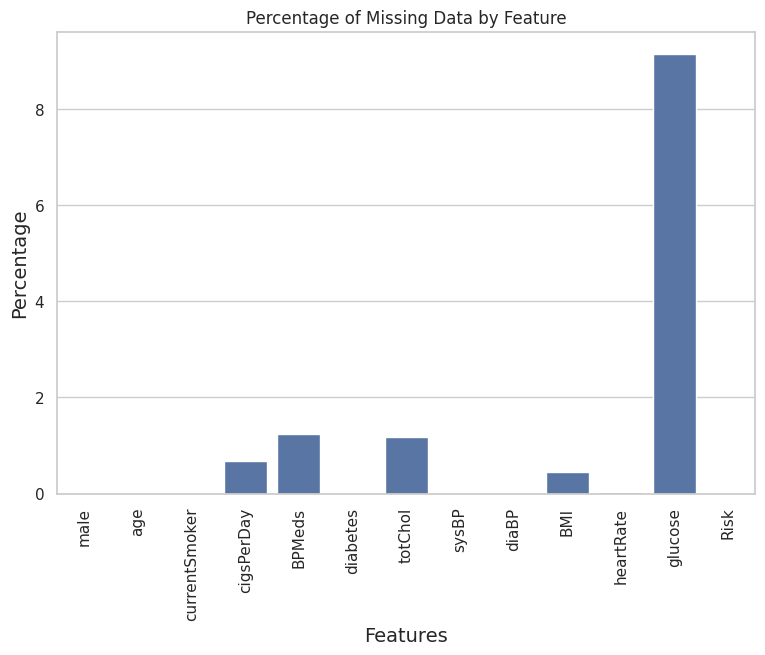

In [ ]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the percentage of missing data for each feature
missing_data = data.isnull().sum().to_frame(name='Total')
missing_data['Percentage'] = (missing_data['Total'] / len(data)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Drop missing values
data.dropna(axis=0,inplace=True)

In [ ]:
# checking for missing values
missing_data=data.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64
The total percentage of missing data is 0.0%


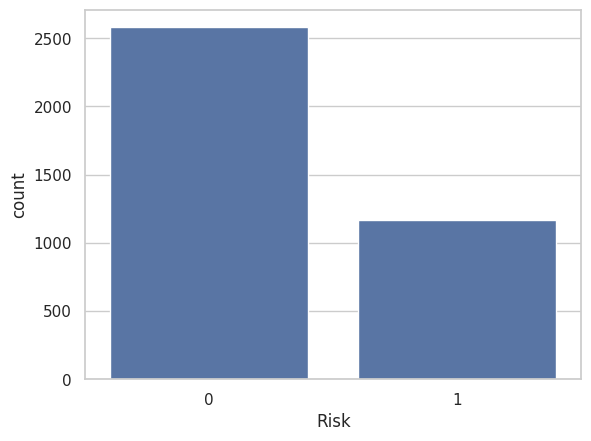

There are 2581 patients without risk of Hypertension and 1170 patients with risk of Hypertension


In [ ]:
sns.countplot(x="Risk",data=data)
plt.show()
cases=data.Risk.value_counts()
print(f"There are {cases[0]} patients without risk of Hypertension and {cases[1]} patients with risk of Hypertension")

/tmp/ipython-input-58-2619390697.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


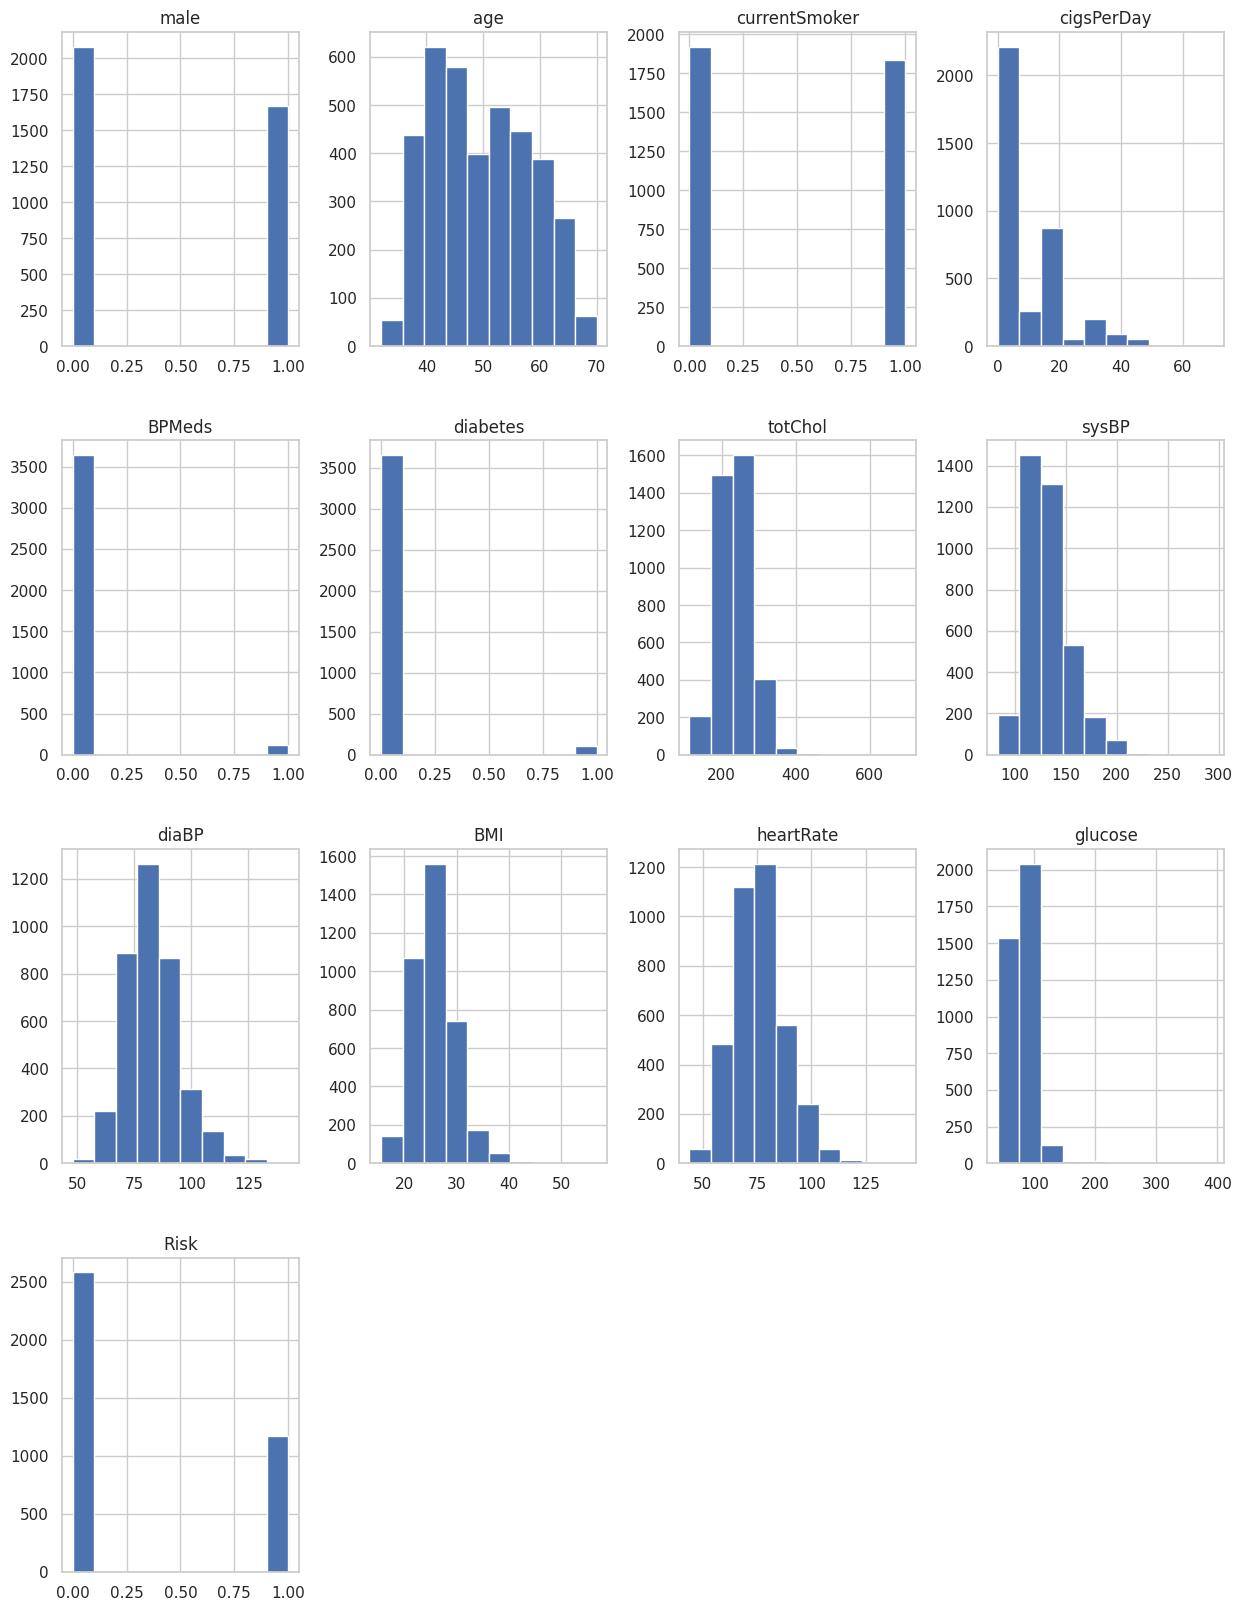

In [ ]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
data.hist(ax = ax)
plt.show()

In [ ]:
data["Risk"].value_counts(normalize=True)

,proportion
Risk,
0,0.688083
1,0.311917


In [ ]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.311917
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.463338
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#putting the features into the same scale
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Accuracy: 0.8828229027962716
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       516
           1       0.80      0.83      0.82       235

    accuracy                           0.88       751
   macro avg       0.86      0.87      0.86       751
weighted avg       0.88      0.88      0.88       751



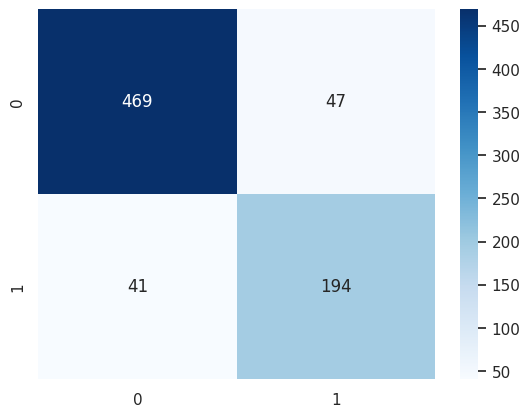


Importancia de las variables:


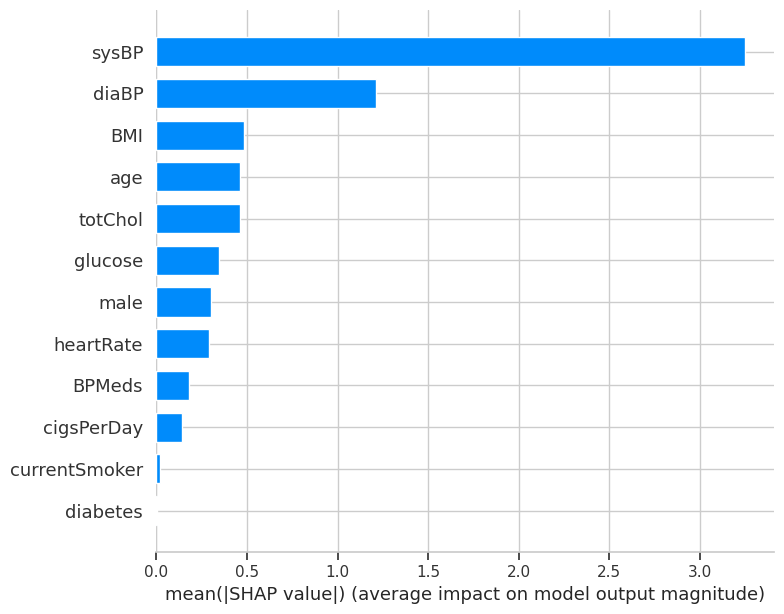

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


X = data.drop(columns="Risk")
y = data["Risk"]

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento XGBoost
model = XGBClassifier(n_estimators=100, random_state=42, eval_metric="logloss")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

# SHAP para interpretabilidad
print("\nImportancia de las variables:")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

##DATASET: blood Pressure Data for disease Prediction

In [ ]:
import pandas as pd

data2 = pd.read_csv("data.csv")
print(data.columns.tolist())

['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk']


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [ ]:
# checking for missing values
missing_data2=data2.isnull().sum()
print("\nMissing data:")
print(missing_data2)
total_percentage2=(missing_data2.sum()/data2.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage2,2)}%")


Missing data:
Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64
The total percentage of missing data is 94.6%


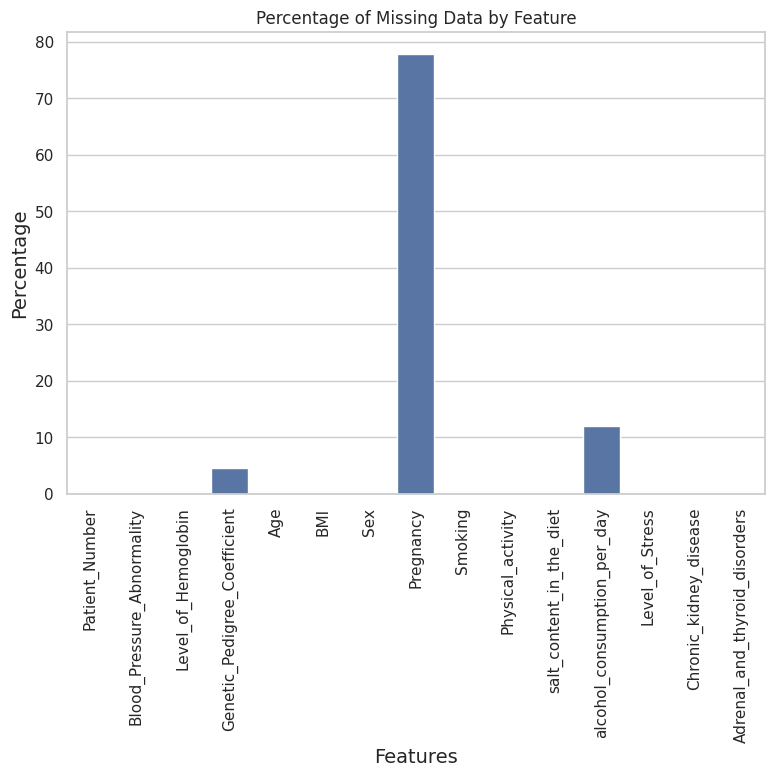

In [ ]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the percentage of missing data for each feature
missing_data2 = data2.isnull().sum().to_frame(name='Total')
missing_data2['Percentage'] = (missing_data2['Total'] / len(data2)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data2.index, y=missing_data2['Percentage'], data=missing_data2)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
data2.drop(columns=[
    "Patient_Number",
    "Pregnancy",
    "Physical_activity",
    "salt_content_in_the_diet"
], inplace=True)

data2["Genetic_Pedigree_Coefficient"] = data2["Genetic_Pedigree_Coefficient"].fillna(data2["Genetic_Pedigree_Coefficient"].median())
data2["alcohol_consumption_per_day"] = data2["alcohol_consumption_per_day"].fillna(0)


In [ ]:
# checking for missing values
missing_data2=data2.isnull().sum()
print("\nMissing data:")
print(missing_data2)
total_percentage2=(missing_data2.sum()/data2.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage2,2)}%")


Missing data:
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64
The total percentage of missing data is 0.0%


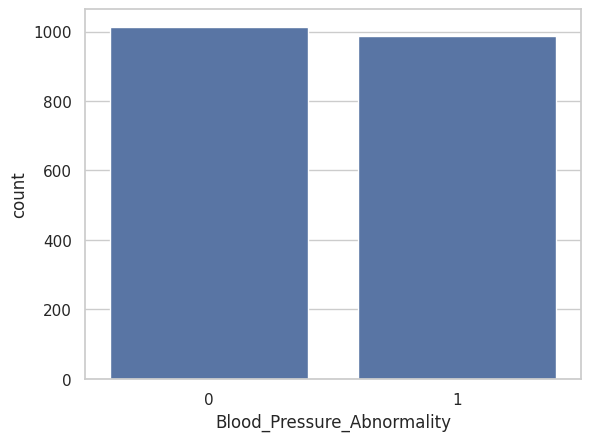

There are 1013 patients without abnormal blood pressure and 987 patients with abnormal blood pressure.


In [ ]:
# Gráfico de barras para distribución de clases
sns.countplot(x="Blood_Pressure_Abnormality", data=data2)
plt.show()

# Conteo de clases
cases = data2["Blood_Pressure_Abnormality"].value_counts()
print(f"There are {cases[0]} patients without abnormal blood pressure and {cases[1]} patients with abnormal blood pressure.")

/tmp/ipython-input-70-434367394.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data2.hist(ax = ax)


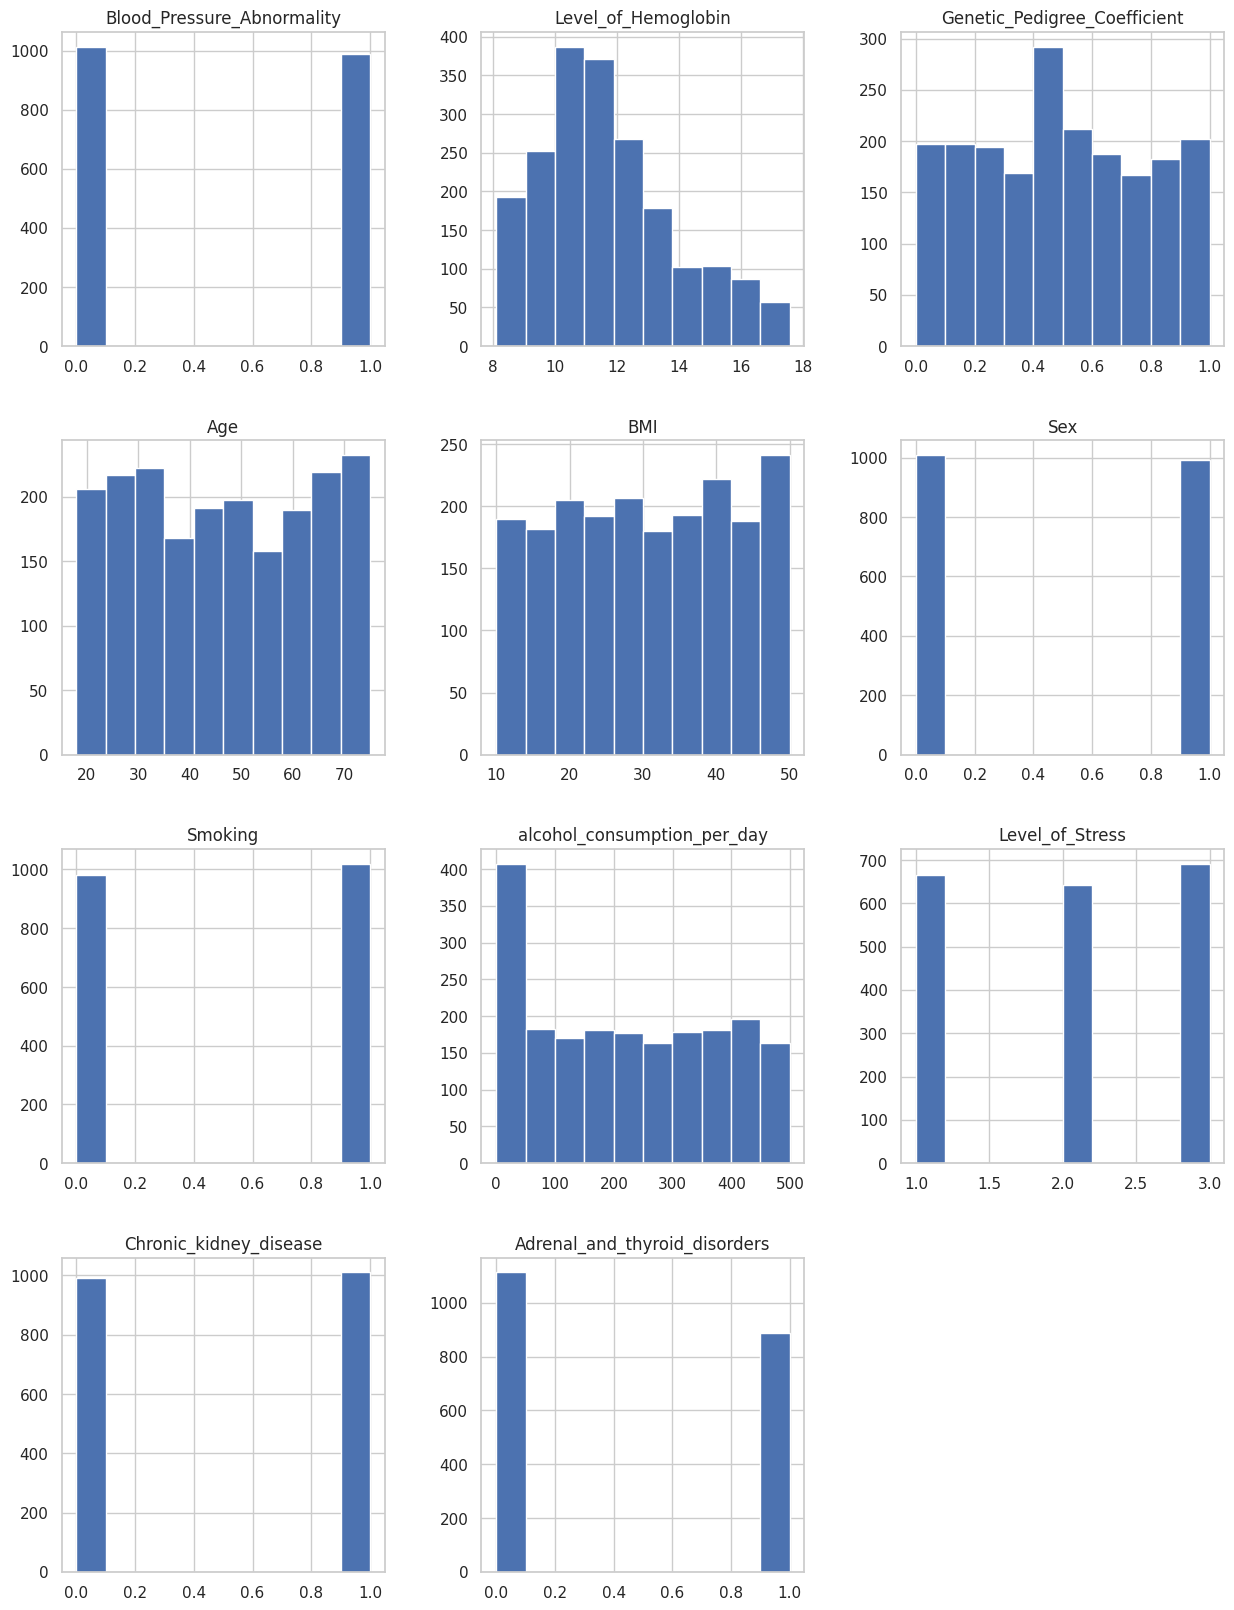

In [ ]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
data2.hist(ax = ax)
plt.show()

In [ ]:
data2["Blood_Pressure_Abnormality"].value_counts(normalize=True)

,proportion
Blood_Pressure_Abnormality,
0,0.5065
1,0.4935


In [ ]:
data2.describe()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000
mean,0.493500,11.710035,0.494595,46.558500,30.081500,0.496000,0.509500,220.636500,2.012500,0.5050,0.443500
std,0.500083,2.186701,0.284945,17.107832,11.761208,0.500109,0.500035,157.614106,0.823822,0.5001,0.496922
min,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.0000,0.000000
25%,0.000000,10.147500,0.250000,32.000000,20.000000,0.000000,0.000000,79.000000,1.000000,0.0000,0.000000
50%,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,1.000000,212.500000,2.000000,1.0000,0.000000
75%,1.000000,12.945000,0.730000,62.000000,40.000000,1.000000,1.000000,360.250000,3.000000,1.0000,1.000000
max,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,499.000000,3.000000,1.0000,1.000000


In [ ]:
data2.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,0,0.0,2,1,1
1,0,9.75,0.23,54,33,1,0,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0,397.0,2,0,0


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.86588 | test_accuracy: 0.5675  |  0:00:00s
epoch 1  | loss: 0.70667 | test_accuracy: 0.605   |  0:00:00s
epoch 2  | loss: 0.66085 | test_accuracy: 0.64    |  0:00:00s
epoch 3  | loss: 0.66015 | test_accuracy: 0.65    |  0:00:00s
epoch 4  | loss: 0.63308 | test_accuracy: 0.675   |  0:00:00s
epoch 5  | loss: 0.61774 | test_accuracy: 0.6975  |  0:00:00s
epoch 6  | loss: 0.60044 | test_accuracy: 0.6825  |  0:00:00s
epoch 7  | loss: 0.57982 | test_accuracy: 0.71    |  0:00:00s
epoch 8  | loss: 0.57107 | test_accuracy: 0.7     |  0:00:00s
epoch 9  | loss: 0.5574  | test_accuracy: 0.74    |  0:00:00s
epoch 10 | loss: 0.54111 | test_accuracy: 0.74    |  0:00:00s
epoch 11 | loss: 0.5229  | test_accuracy: 0.735   |  0:00:00s
epoch 12 | loss: 0.525   | test_accuracy: 0.7275  |  0:00:00s
epoch 13 | loss: 0.51229 | test_accuracy: 0.73    |  0:00:00s
epoch 14 | loss: 0.50434 | test_accuracy: 0.7375  |  0:00:00s
epoch 15 | loss: 0.51101 | test_accuracy: 0.75    |  0:00:00s
epoch 16

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


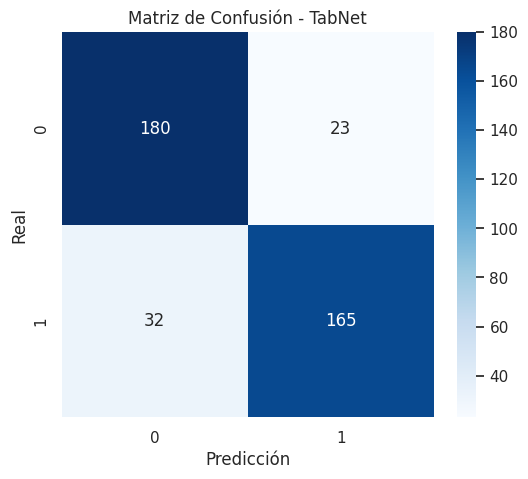


Importancia de las variables:
                         Feature  Importance
1   Genetic_Pedigree_Coefficient    0.317630
0            Level_of_Hemoglobin    0.302873
4                            Sex    0.136157
9  Adrenal_and_thyroid_disorders    0.068085
6    alcohol_consumption_per_day    0.060671
3                            BMI    0.035287
8         Chronic_kidney_disease    0.032589
7                Level_of_Stress    0.022894
2                            Age    0.020052
5                        Smoking    0.003763


/tmp/ipython-input-74-1779771818.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


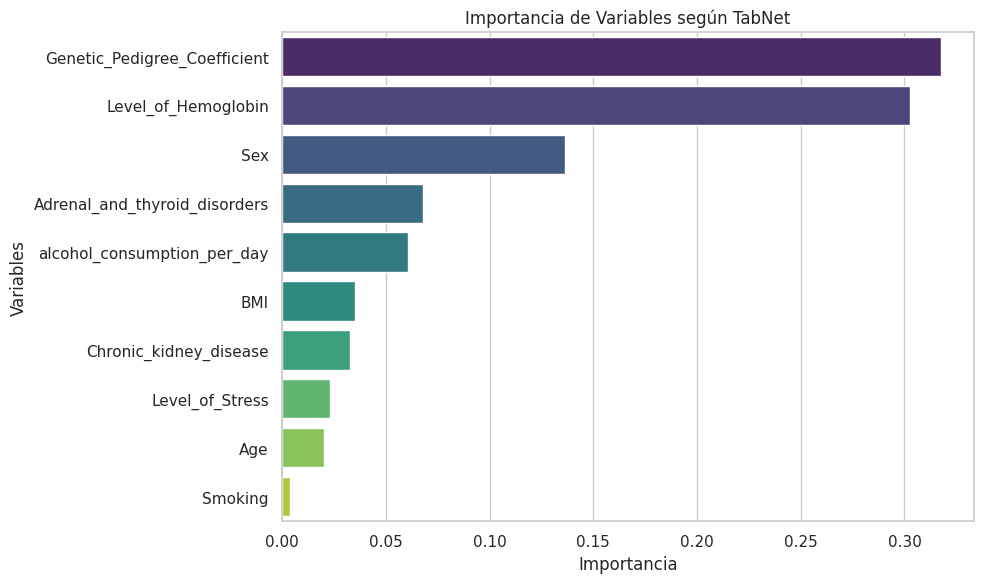

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Definir variables predictoras y variable objetivo
X = data2.drop(columns='Blood_Pressure_Abnormality')
y = data2['Blood_Pressure_Abnormality']

# División inicial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a float32 (requerido por TabNet)
X_train_np = X_train_scaled.astype(np.float32)
y_train_np = y_train.values.astype(np.int64)
X_test_np = X_test_scaled.astype(np.float32)
y_test_np = y_test.values.astype(np.int64)

# Inicializar TabNet
tabnet = TabNetClassifier(
    device_name='cuda' if torch.cuda.is_available() else 'cpu',
    verbose=1
)

# Entrenamiento
tabnet.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_name=['test'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024
)

# Predicción
y_pred = tabnet.predict(X_test_np)
print("Accuracy:", accuracy_score(y_test_np, y_pred))
print("Classification Report:\n", classification_report(y_test_np, y_pred))


# Matriz de confusión
cm = confusion_matrix(y_test_np, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TabNet')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Interpretabilidad con TabNet
importances = tabnet.feature_importances_
feature_names = X.columns

# Crear DataFrame para visualizar
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de las variables:")
print(feat_imp_df)

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Importancia de Variables según TabNet")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()